This figure is intended to show the percentage of homes not currently owning an appliance that stated a desire to purchase that appliance.  To do this we:

- Create a new column for each appliance that is 
    - null if that appliance is already owned
    - zero if not owned and will purchase
    - one if not owned and won't purchase
- We aggregate and average this column by access type to get percentages
- We plot this by appliance

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pysentani as sti

In [2]:
survey = pd.read_excel('../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx')
# pysentani access type function
survey['access_type'] = sti.access_type(survey)
survey = survey[['app_now/rice_cooker',
                 'app_now/TV',
                 'app_now/fridge',
                 'app_now/fan',
                 'app_now/lighting',
                 'app_now/radio',
                 'app_buy/rice_cooker',
                 'app_buy/TV',
                 'app_buy/fridge',
                 'app_buy/fan',
                 'app_buy/lighting',
                 'app_buy/radio',
                 'access_type',]]
# dropping all NaN values for above columns
# we don't need to do these per appliance because the nulls are correlated
survey = survey.dropna()

In [3]:
def willing_to_buy(row, now=None, buy=None):
    if row[now]==1:
        # we return zero in the case where we want to determine the latent demand
        return np.nan
        #return 0
    if row[now]==0 and row[buy]==0:
        return 0
    if row[now]==0 and row[buy]==1:
        return 1

def calc_willingness(survey, appliance):
    app_now_appliance = 'app_now/' + appliance
    app_buy_appliance = 'app_buy/' + appliance
    # when we average this, do we exclude the folks with the appliance?
    #survey['wb/' + appliance] = ~survey[app_now_appliance].astype(bool) & survey[app_buy_appliance].astype(bool)
    survey['wb/' + appliance] = survey.apply(willing_to_buy, 
                                axis=1, 
                                now=app_now_appliance,
                                buy=app_buy_appliance)

appliance_list = ['fridge', 'rice_cooker', 'fan', 'radio', 'TV', 'lighting' ]

# Creating variable with for loop adding each from appliance_list to calc_willingess function
WBlist = []
for appliance in appliance_list:
    calc_willingness(survey, appliance)
    WBlist.append('wb/' + appliance)

In [4]:
wb = survey[['wb/rice_cooker',
                 'wb/TV',
                 'wb/fridge',
                 'wb/fan',
                 'wb/lighting',
                 'wb/radio',
                 'access_type',]]

wb.columns = [col.replace('wb/', '') for col in wb.columns]

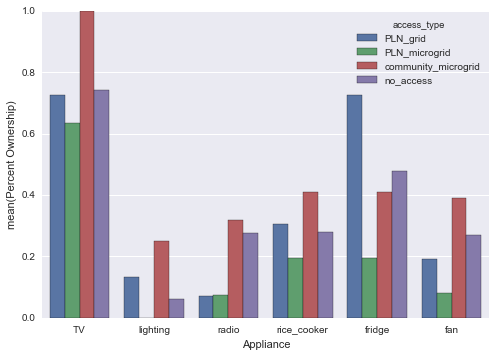

In [5]:
wb_mean = wb.groupby('access_type').mean().stack()
wb_mean = wb_mean.reset_index()
wb_mean.rename(columns={'level_1':'Appliance', 0:'Percent Ownership'},
              inplace=True)
sns.barplot(hue='access_type', y='Percent Ownership', x='Appliance', 
            order=['TV', 'lighting', 'radio', 'rice_cooker', 'fridge', 'fan'], data=wb_mean)
plt.savefig('appliance-demand-by-access-type.png')